In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
! kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset --unzip

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
 98% 146M/149M [00:04<00:00, 44.2MB/s]
100% 149M/149M [00:04<00:00, 37.2MB/s]


In [ ]:
def get_class_paths(path):
  classes = []
  class_paths = []

  for label in os.listdir(path):
    label_path = os.path.join(path, label)

    if os.path.isdir(label_path):
      for image in os.listdir(label_path):
        image_path = os.path.join(label_path, image)

        classes.append(label)
        class_paths.append(image_path)

  df = pd.DataFrame({
      'Class Path': class_paths,
      'Class': classes
  })

  return df

In [ ]:
tr_df = get_class_paths("/content/Training")


In [ ]:
tr_df

,Class Path,Class
0,/content/Training/notumor/Tr-no_0794.jpg,notumor
1,/content/Training/notumor/Tr-no_1039.jpg,notumor
2,/content/Training/notumor/Tr-no_0972.jpg,notumor
3,/content/Training/notumor/Tr-no_0559.jpg,notumor
4,/content/Training/notumor/Tr-no_1252.jpg,notumor
...,...,...
5707,/content/Training/glioma/Tr-gl_0255.jpg,glioma
5708,/content/Training/glioma/Tr-gl_0182.jpg,glioma
5709,/content/Training/glioma/Tr-gl_0553.jpg,glioma
5710,/content/Training/glioma/Tr-gl_0380.jpg,glioma


In [ ]:
tr_df.head()

,Class Path,Class
0,/content/Training/notumor/Tr-no_0794.jpg,notumor
1,/content/Training/notumor/Tr-no_1039.jpg,notumor
2,/content/Training/notumor/Tr-no_0972.jpg,notumor
3,/content/Training/notumor/Tr-no_0559.jpg,notumor
4,/content/Training/notumor/Tr-no_1252.jpg,notumor


In [ ]:
ts_df = get_class_paths("/content/Testing")

In [ ]:
ts_df

,Class Path,Class
0,/content/Testing/notumor/Te-no_0097.jpg,notumor
1,/content/Testing/notumor/Te-no_0301.jpg,notumor
2,/content/Testing/notumor/Te-noTr_0000.jpg,notumor
3,/content/Testing/notumor/Te-no_0222.jpg,notumor
4,/content/Testing/notumor/Te-no_0139.jpg,notumor
...,...,...
1306,/content/Testing/glioma/Te-gl_0280.jpg,glioma
1307,/content/Testing/glioma/Te-gl_0163.jpg,glioma
1308,/content/Testing/glioma/Te-gl_0194.jpg,glioma
1309,/content/Testing/glioma/Te-gl_0146.jpg,glioma


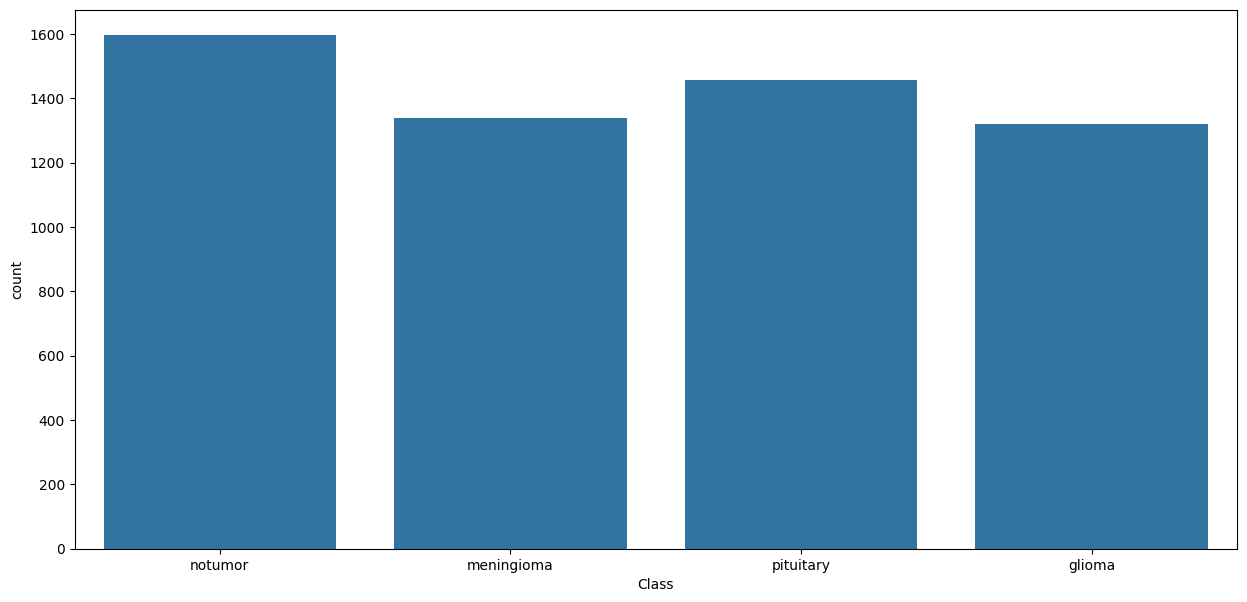

In [ ]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data=tr_df, x=tr_df['Class'])

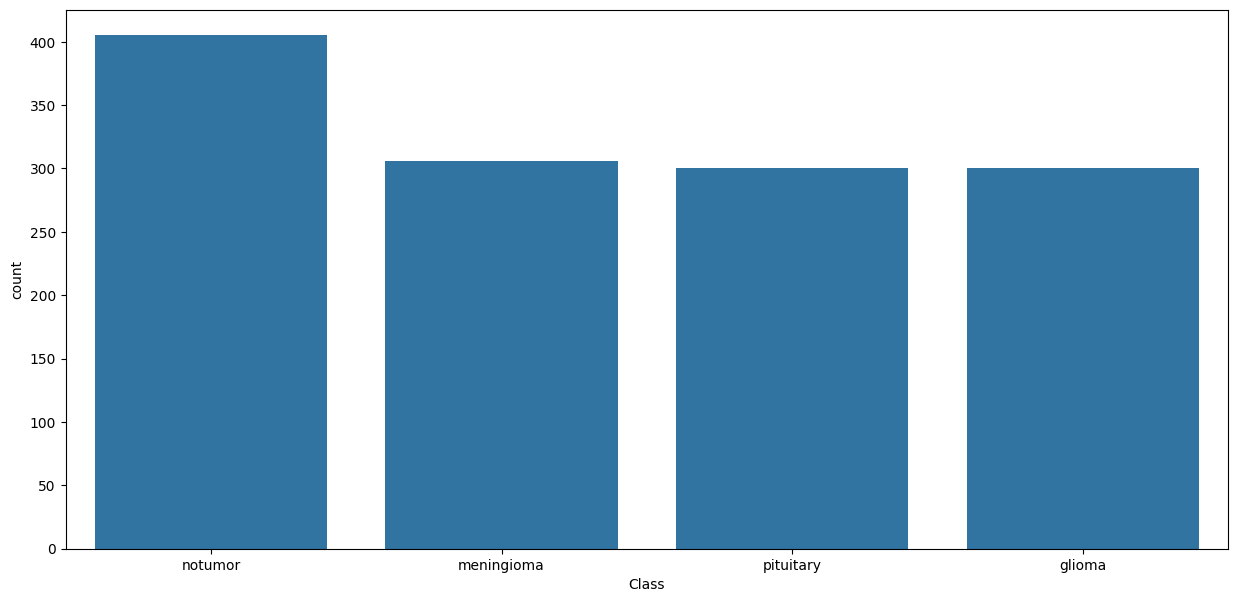

In [ ]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data=ts_df, x=ts_df['Class'])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow import keras
from keras.src.layers import Lambda
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
valid_df, ts_df = train_test_split(ts_df, train_size=0.5, stratify=ts_df["Class"])

In [ ]:
valid_df

,Class Path,Class
1244,/content/Testing/glioma/Te-gl_0139.jpg,glioma
712,/content/Testing/pituitary/Te-pi_0087.jpg,pituitary
608,/content/Testing/meningioma/Te-me_0300.jpg,meningioma
210,/content/Testing/notumor/Te-no_0391.jpg,notumor
1186,/content/Testing/glioma/Te-gl_0232.jpg,glioma
...,...,...
326,/content/Testing/notumor/Te-noTr_0004.jpg,notumor
594,/content/Testing/meningioma/Te-me_0177.jpg,meningioma
105,/content/Testing/notumor/Te-no_0030.jpg,notumor
581,/content/Testing/meningioma/Te-me_0196.jpg,meningioma


In [ ]:
ts_df

,Class Path,Class
1259,/content/Testing/glioma/Te-glTr_0001.jpg,glioma
206,/content/Testing/notumor/Te-no_0195.jpg,notumor
1261,/content/Testing/glioma/Te-gl_0239.jpg,glioma
965,/content/Testing/pituitary/Te-pi_0200.jpg,pituitary
461,/content/Testing/meningioma/Te-me_0015.jpg,meningioma
...,...,...
488,/content/Testing/meningioma/Te-me_0255.jpg,meningioma
604,/content/Testing/meningioma/Te-me_0063.jpg,meningioma
1140,/content/Testing/glioma/Te-gl_0197.jpg,glioma
394,/content/Testing/notumor/Te-no_0245.jpg,notumor


In [ ]:
batch_size = 32

img_size = (299, 299)

image_generator = ImageDataGenerator(rescale=1/255, brightness_range=(0.8, 1.2))

ts_gen = ImageDataGenerator(rescale=1/255)

In [ ]:
print(tr_df.columns)

Index(['Class Path', 'Class'], dtype='object')


In [ ]:
tr_gen = image_generator.flow_from_dataframe(tr_df,
  x_col='Class Path',
  y_col="Class",
  batch_size=batch_size,
  target_size=img_size,
)

valid_gen = image_generator.flow_from_dataframe(valid_df,
  x_col='Class Path',
  y_col="Class",
  batch_size=batch_size,
  target_size=img_size,
)

ts_gen = ts_gen.flow_from_dataframe(ts_df,
  x_col='Class Path',
  y_col="Class",
  batch_size=16,
  target_size=img_size,
  shuffle=False,
)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


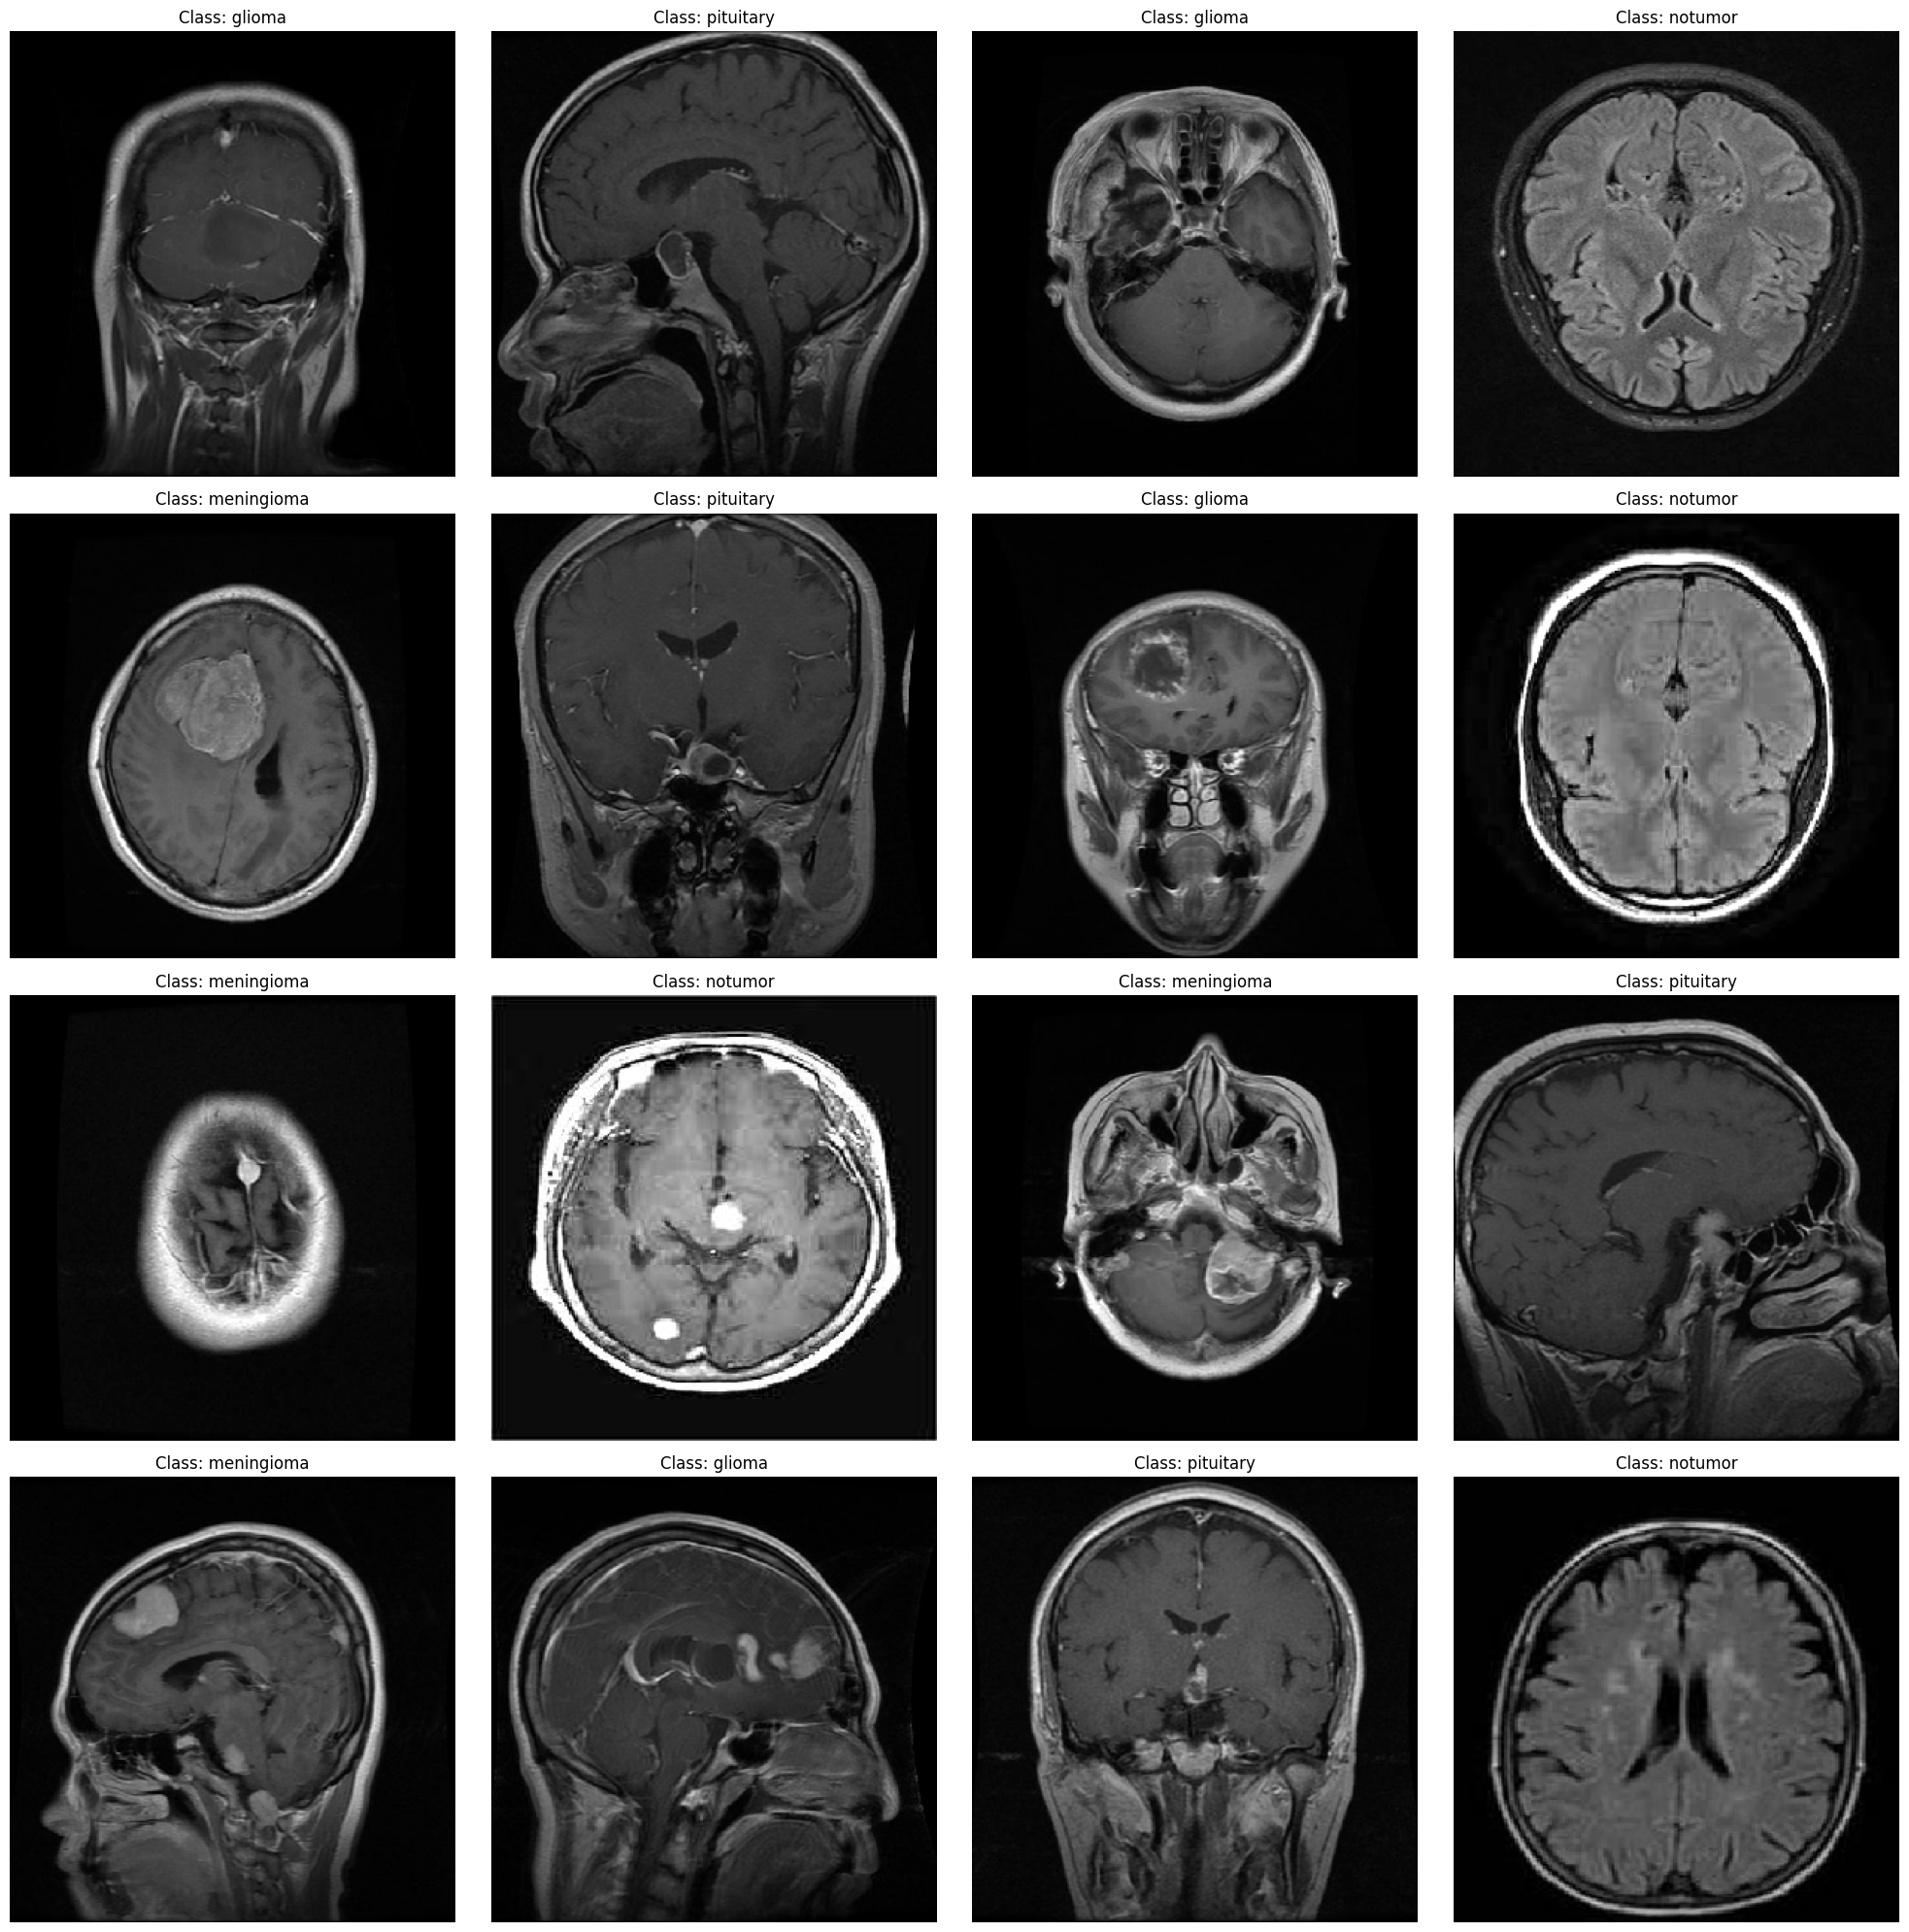

In [ ]:
plt.figure(figsize=(20, 20))
for i in range(16):
  plt.subplot(4, 4, i + 1)
  batch = next(tr_gen)
  image = batch[0][0]
  label = batch[1][0]
  plt.imshow(image)

  class_index = np.argmax(label)

  class_names = list(tr_gen.class_indices.keys())
  class_indicies = list(tr_gen.class_indices.values())

  index_position = class_indicies.index(class_index)

  class_name = class_names[index_position]

  plt.title(f'Class: {class_name}')
  plt.axis("off")

plt.tight_layout()
plt.show()

In [ ]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [ ]:
img_shape = (299, 299, 3)

base_model = tf.keras.applications.Xception(include_top=False,
                                            weights="imagenet",
                                            input_shape=img_shape,
                                            pooling="max")

model = Sequential([
    base_model,
    Flatten(),
    Dropout(0.3),
    Dense(128, activation="relu"),
    Dropout(rate=0.25),
    Dense(4, activation="softmax")
])


83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:
model.compile(Adamax(learning_rate=0.001),
              loss="categorical_crossentropy",
              metrics=["accuracy", Precision(), Recall()])

In [ ]:
hist = model.fit(tr_gen,
                 epochs=5,
                 validation_data=valid_gen,
)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


179/179 ━━━━━━━━━━━━━━━━━━━━ 284s 1s/step - accuracy: 0.7805 - loss: 0.6808 - precision: 0.8564 - recall: 0.6978 - val_accuracy: 0.9023 - val_loss: 0.3101 - val_precision: 0.9101 - val_recall: 0.8962
Epoch 2/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 156s 865ms/step - accuracy: 0.9818 - loss: 0.0675 - precision: 0.9824 - recall: 0.9803 - val_accuracy: 0.9099 - val_loss: 0.1861 - val_precision: 0.9208 - val_recall: 0.9053
Epoch 3/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 156s 863ms/step - accuracy: 0.9887 - loss: 0.0411 - precision: 0.9891 - recall: 0.9886 - val_accuracy: 0.9679 - val_loss: 0.0925 - val_precision: 0.9709 - val_recall: 0.9664
Epoch 4/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 202s 866ms/step - accuracy: 0.9880 - loss: 0.0396 - precision: 0.9886 - recall: 0.9877 - val_accuracy: 0.9832 - val_loss: 0.0570 - val_precision: 0.9847 - val_recall: 0.9832
Epoch 5/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 202s 866ms/step - accuracy: 0.9965 - loss: 0.0151 - precision: 0.9966 - recall: 0.9962 - val_accuracy: 0.9954 - val_loss: 

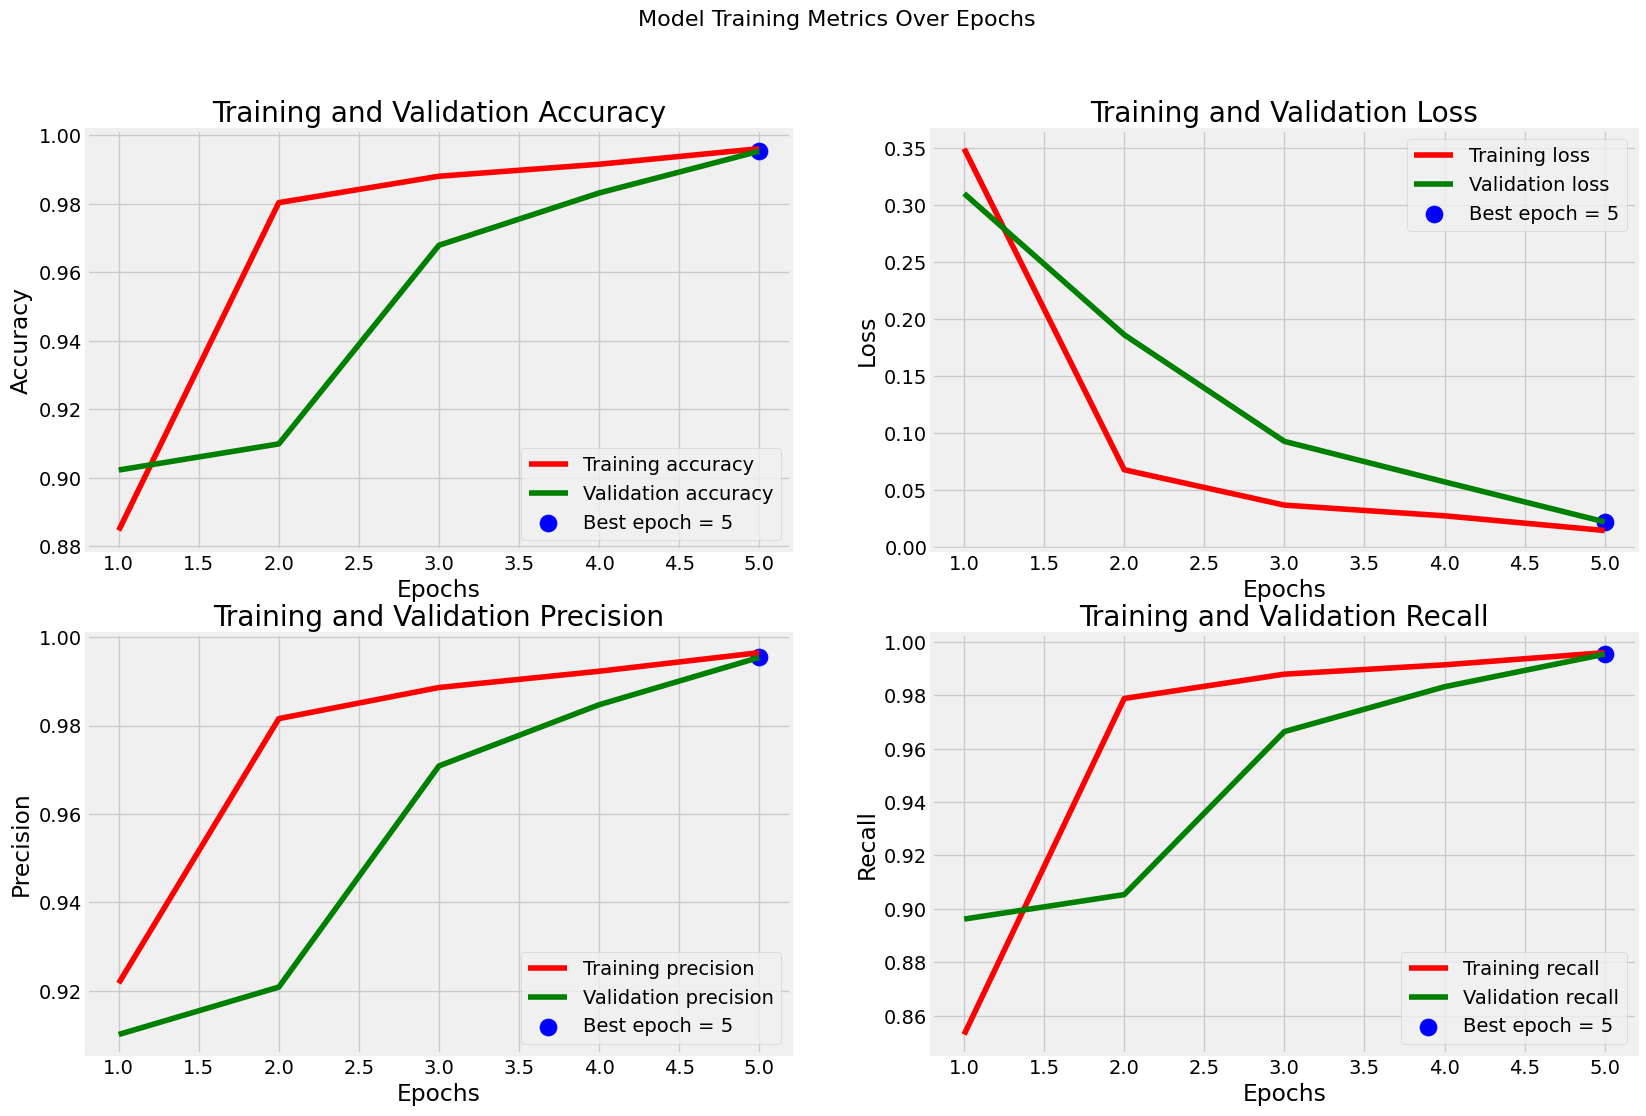

In [ ]:
metrics = ["accuracy", "loss", "precision", "recall"]
tr_metrics = {m: hist.history[m] for m in metrics}
val_metrics = {m: hist.history[f"val_{m}"] for m in metrics}

best_epochs = {}
best_values = {}

for m in metrics:
    if m == 'loss':
        idx = np.argmin(val_metrics[m])
    else:
        idx = np.argmax(val_metrics[m])

    best_epochs[m] = idx + 1
    best_values[m] = val_metrics[m][idx]


plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    epochs = range(1, len(tr_metrics[metric]) + 1)

    plt.plot(epochs, tr_metrics[metric], 'r', label=f'Training {metric}')
    plt.plot(epochs, val_metrics[metric], 'g', label=f'Validation {metric}')
    plt.scatter(best_epochs[metric], best_values[metric], s=150,c='blue',
                label=f'Best epoch = {best_epochs[metric]}')

    plt.title(f'Training and Validation {metric.title()}')
    plt.xlabel('Epochs')
    plt.ylabel(metric.title())
    plt.legend()
    plt.grid(True)

plt.suptitle('Model Training Metrics Over Epochs', fontsize=16)
plt.show()

In [ ]:
train_score = model.evaluate(tr_gen, verbose=1)
valid_score = model.evaluate(valid_gen, verbose=1)
test_score = model.evaluate(ts_gen, verbose=1)

print(f"Train Accuracy: {train_score[1]*100:.2f}%")
print(f"Train Loss: {train_score[0]:.4f}")
print(f"\nValidation Accuracy: {valid_score[1]*100:.2f}%")
print(f"Validation Loss: {valid_score[0]:.4f}")
print(f"\n\nTest Accuracy: {test_score[1]*100:.2f}%")
print(f"Test Loss: {test_score[0]:.4f}")

179/179 ━━━━━━━━━━━━━━━━━━━━ 46s 254ms/step - accuracy: 0.9996 - loss: 0.0035 - precision: 0.9996 - recall: 0.9996
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 212ms/step - accuracy: 0.9934 - loss: 0.0195 - precision: 0.9972 - recall: 0.9934
 1/41 ━━━━━━━━━━━━━━━━━━━━ 7s 198ms/step - accuracy: 1.0000 - loss: 0.0390 - precision: 1.0000 - recall: 1.0000

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 115ms/step - accuracy: 0.9919 - loss: 0.0232 - precision: 0.9919 - recall: 0.9919
Train Accuracy: 99.95%
Train Loss: 0.0032

Validation Accuracy: 99.39%
Validation Loss: 0.0221


Test Accuracy: 98.78%
Test Loss: 0.0295


41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 110ms/step


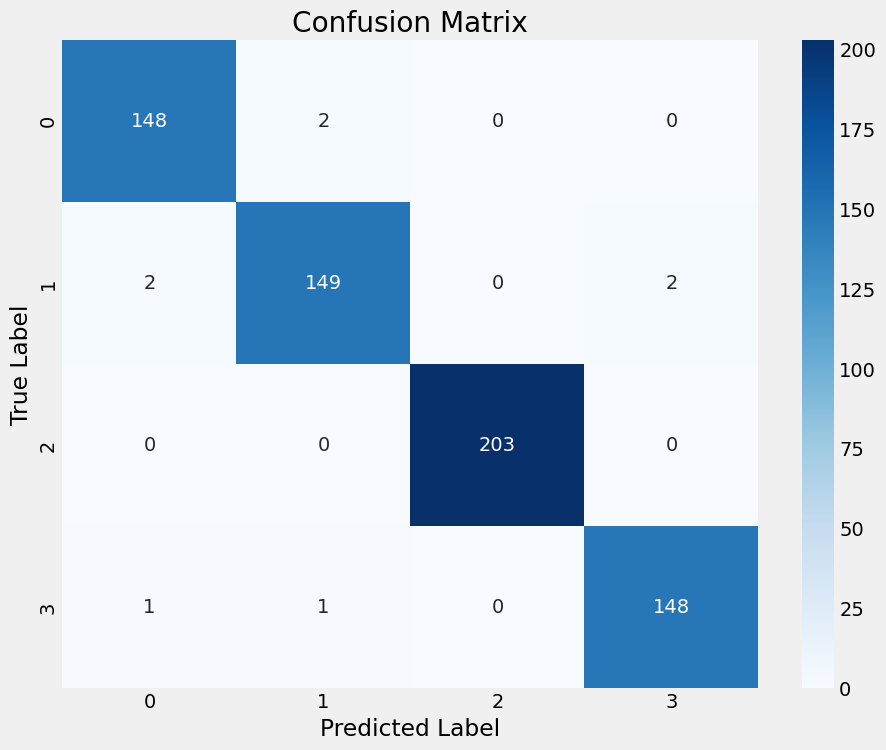

In [ ]:
preds = model.predict(ts_gen)
y_pred = np.argmax(preds, axis=1)

class_dict = {
    0: "glioma",
    1: "meningioma",
    2: "no_tumor",
    3: "pituitary"
}

cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from PIL import Image

def predict(img_path: str) -> str:
    labels = list(class_dict.keys())
    plt.figure(figsize=(6, 8))

    img = Image.open(img_path)
    resized_img = img.resize((299, 299))
    img_array = np.asarray(resized_img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    predictions = model.predict(img_array)
    probabilities = list(predictions[0])

    predicted_class_idx = np.argmax(probabilities)
    predicted_class = class_dict[predicted_class_idx]

    plt.subplot(2, 1, 1)
    plt.imshow(resized_img)
    plt.title(f'Input MRI Image\nPredicted: {predicted_class}')

    plt.subplot(2, 1, 2)
    bars = plt.barh(labels, probabilities)
    plt.xlabel('Probability', fontsize=15)
    plt.title('Class Probabilities')

    ax = plt.gca()
    ax.bar_label(bars, fmt='%.2f')

    plt.tight_layout()
    plt.show()

    print(f"\nPredicted Tumor Type: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


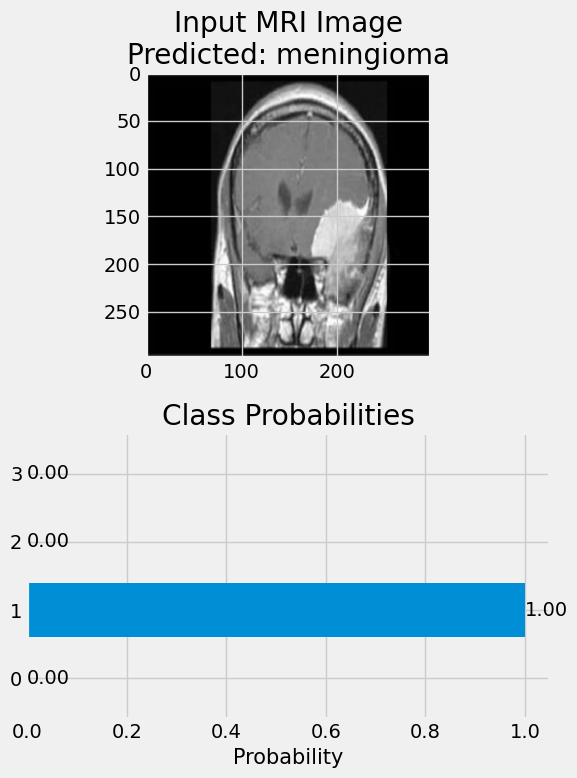


Predicted Tumor Type: meningioma


In [ ]:
predict("/content/Testing/meningioma/Te-meTr_0000.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


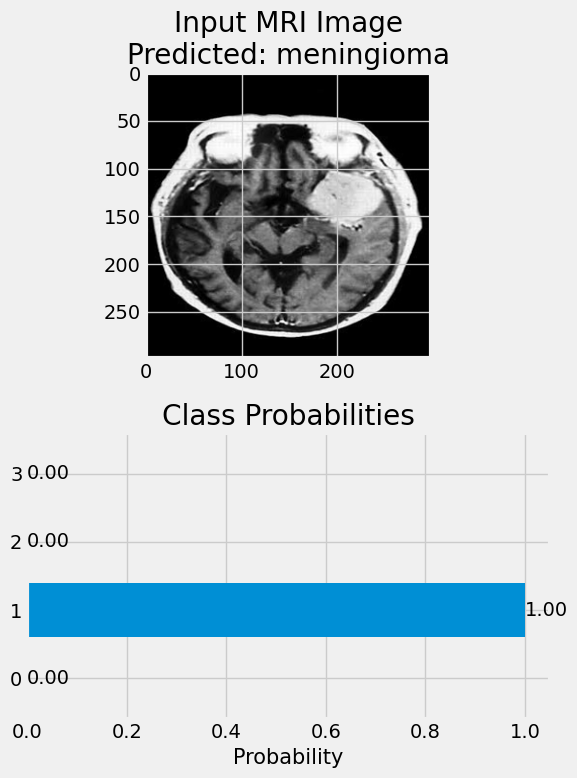


Predicted Tumor Type: meningioma


In [ ]:
predict("/content/Testing/meningioma/Te-meTr_0005.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


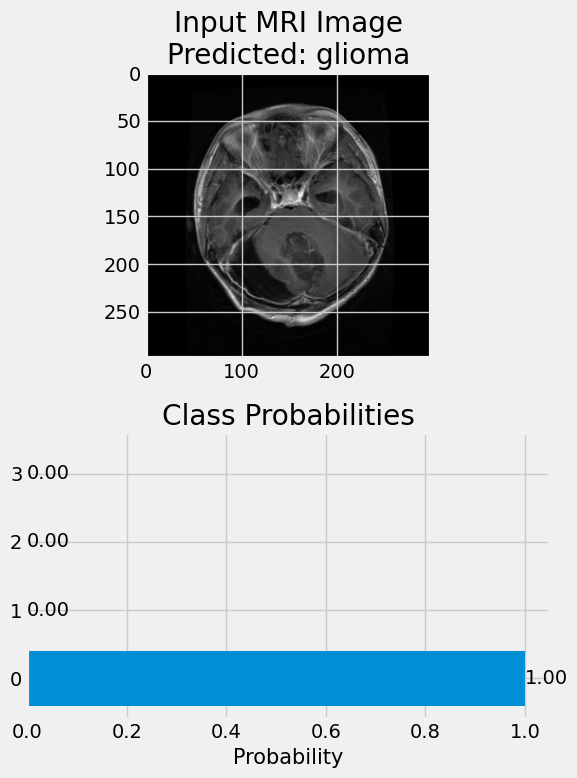


Predicted Tumor Type: glioma


In [ ]:
predict("/content/Testing/glioma/Te-glTr_0000.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


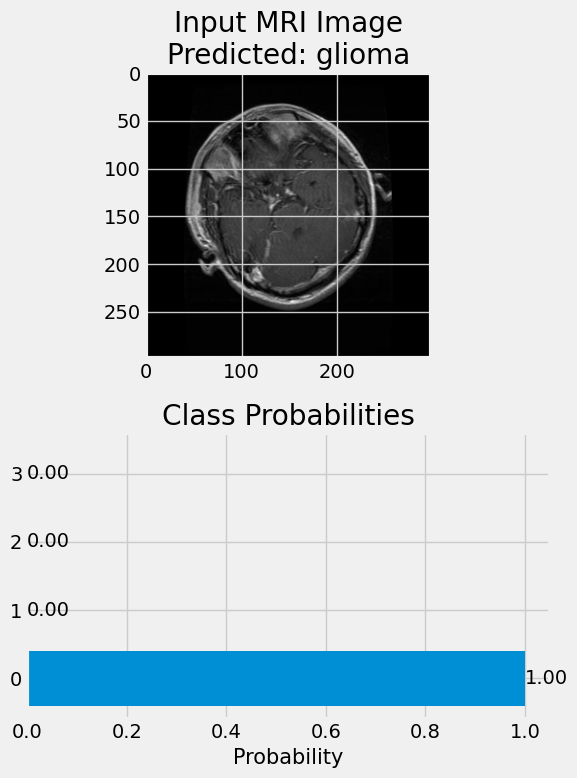


Predicted Tumor Type: glioma


In [ ]:
predict("/content/Testing/glioma/Te-glTr_0006.jpg")

In [ ]:
model.save_weights("xception_model.weights.h5")

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import regularizers

In [ ]:
batch_size = 16

img_size = (224, 224)

image_generator = ImageDataGenerator(rescale=1/255, brightness_range=(0.8, 1.2))

ts_gen = ImageDataGenerator(rescale=1/255)

tr_gen = image_generator.flow_from_dataframe(tr_df,
  x_col='Class Path',
  y_col="Class",
  batch_size=batch_size,
  target_size=img_size,
)

valid_gen = image_generator.flow_from_dataframe(valid_df,
  x_col='Class Path',
  y_col="Class",
  batch_size=batch_size,
  target_size=img_size,
)

ts_gen = ts_gen.flow_from_dataframe(ts_df,
  x_col='Class Path',
  y_col="Class",
  batch_size=16,
  target_size=img_size,
  shuffle=False,
)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


In [ ]:
cnn_model = Sequential()

cnn_model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.20))

cnn_model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model.add(Flatten())

cnn_model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
cnn_model.add(Dropout(0.35))

cnn_model.add(Dense(4, activation='softmax'))

cnn_model.compile(
    Adamax(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=[
        'accuracy',
        Precision(name='precision'),
        Recall(name='recall')
    ]
)
cnn_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [ ]:
history = cnn_model.fit(tr_gen, epochs=8, validation_data=valid_gen, callbacks=[early_stopping])

Epoch 1/8


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


357/357 ━━━━━━━━━━━━━━━━━━━━ 67s 145ms/step - accuracy: 0.5525 - loss: 1.8020 - precision: 0.7072 - recall: 0.3630 - val_accuracy: 0.7374 - val_loss: 0.7800 - val_precision: 0.7805 - val_recall: 0.6840
Epoch 2/8
357/357 ━━━━━━━━━━━━━━━━━━━━ 61s 120ms/step - accuracy: 0.8017 - loss: 0.6746 - precision: 0.8267 - recall: 0.7597 - val_accuracy: 0.8290 - val_loss: 0.5960 - val_precision: 0.8724 - val_recall: 0.7832
Epoch 3/8
357/357 ━━━━━━━━━━━━━━━━━━━━ 83s 122ms/step - accuracy: 0.8644 - loss: 0.5399 - precision: 0.8828 - recall: 0.8476 - val_accuracy: 0.8290 - val_loss: 0.5496 - val_precision: 0.8560 - val_recall: 0.8168
Epoch 4/8
357/357 ━━━━━━━━━━━━━━━━━━━━ 43s 120ms/step - accuracy: 0.8936 - loss: 0.4615 - precision: 0.9057 - recall: 0.8768 - val_accuracy: 0.8718 - val_loss: 0.4524 - val_precision: 0.8820 - val_recall: 0.8672
Epoch 5/8
357/357 ━━━━━━━━━━━━━━━━━━━━ 82s 121ms/step - accuracy: 0.9193 - loss: 0.3889 - precision: 0.9272 - recall: 0.9087 - val_accuracy: 0.9145 - val_loss: 0.

In [ ]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'precision', 'recall', 'val_accuracy', 'val_loss', 'val_precision', 'val_recall'])


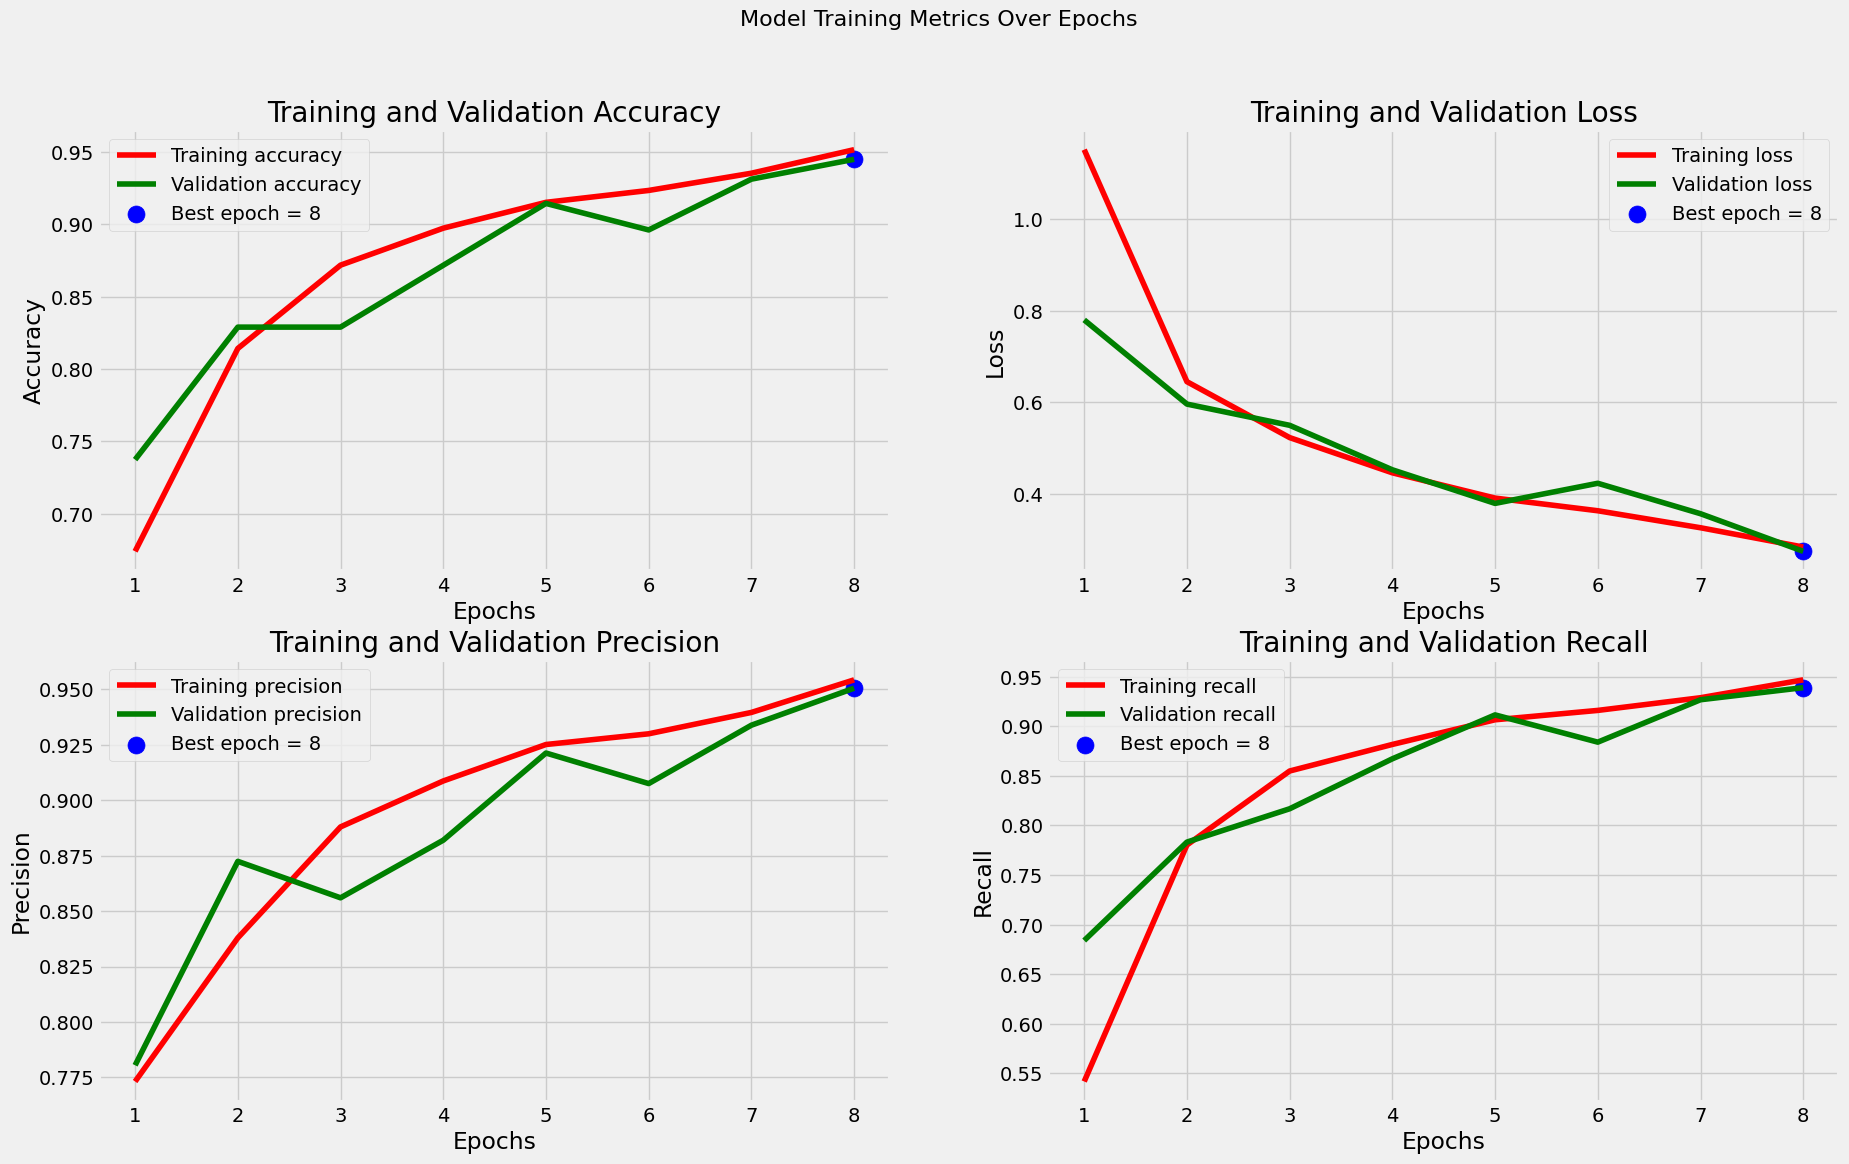

In [ ]:
metrics = ["accuracy", "loss", "precision", "recall"]
tr_metrics = {m: history.history[m] for m in metrics}
val_metrics = {m: history.history[f"val_{m}"] for m in metrics}

best_epochs = {}
best_values = {}

for m in metrics:
    if m == 'loss':
        idx = np.argmin(val_metrics[m])
    else:
        idx = np.argmax(val_metrics[m])

    best_epochs[m] = idx + 1
    best_values[m] = val_metrics[m][idx]


plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    epochs = range(1, len(tr_metrics[metric]) + 1)

    plt.plot(epochs, tr_metrics[metric], 'r', label=f'Training {metric}')
    plt.plot(epochs, val_metrics[metric], 'g', label=f'Validation {metric}')
    plt.scatter(best_epochs[metric], best_values[metric], s=150,c='blue',
                label=f'Best epoch = {best_epochs[metric]}')

    plt.title(f'Training and Validation {metric.title()}')
    plt.xlabel('Epochs')
    plt.ylabel(metric.title())
    plt.legend()
    plt.grid(True)

plt.suptitle('Model Training Metrics Over Epochs', fontsize=16)
plt.show()

In [ ]:
train_score = cnn_model.evaluate(tr_gen, verbose=1)
valid_score = cnn_model.evaluate(valid_gen, verbose=1)
test_score = cnn_model.evaluate(ts_gen, verbose=1)

print(f"Train Accuracy: {train_score[1]*100:.2f}%")
print(f"Train Loss: {train_score[0]:.4f}")
print(f"\nValidation Accuracy: {valid_score[1]*100:.2f}%")
print(f"Validation Loss: {valid_score[0]:.4f}")
print(f"\n\nTest Accuracy: {test_score[1]*100:.2f}%")
print(f"Test Loss: {test_score[0]:.4f}")

357/357 ━━━━━━━━━━━━━━━━━━━━ 21s 60ms/step - accuracy: 0.9662 - loss: 0.2335 - precision: 0.9676 - recall: 0.9648
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.9401 - loss: 0.2926 - precision: 0.9405 - recall: 0.9360
 5/41 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9742 - loss: 0.2448 - precision: 0.9742 - recall: 0.9742

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.9441 - loss: 0.3068 - precision: 0.9500 - recall: 0.9411
Train Accuracy: 96.92%
Train Loss: 0.2310

Validation Accuracy: 94.66%
Validation Loss: 0.2722


Test Accuracy: 93.29%
Test Loss: 0.3348


41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step


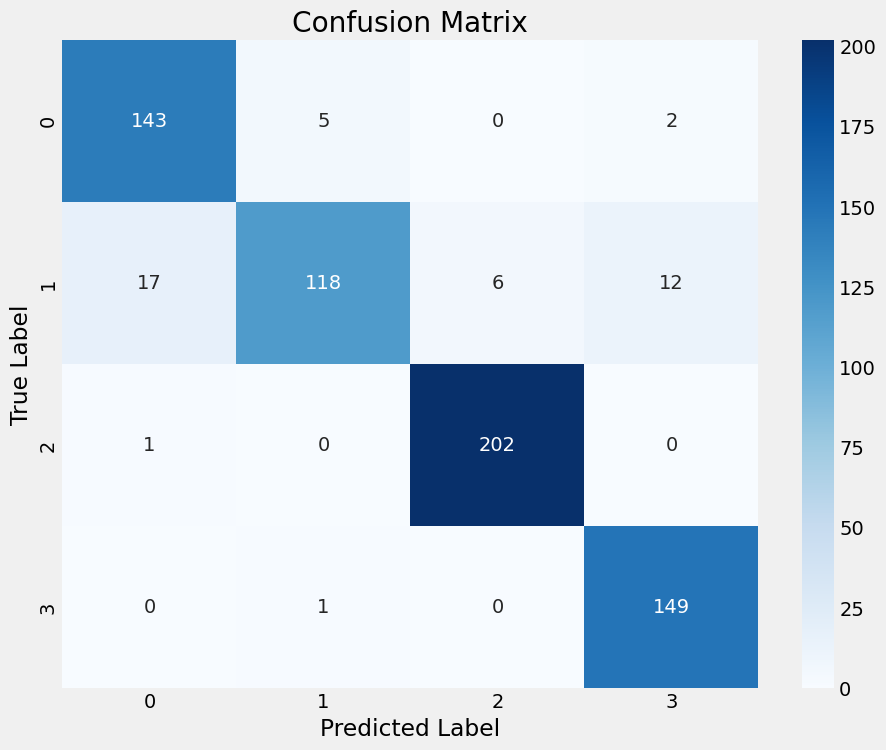

In [ ]:
preds = cnn_model.predict(ts_gen)
y_pred = np.argmax(preds, axis=1)

class_dict = {
    0: "glioma",
    1: "meningioma",
    2: "no_tumor",
    3: "pituitary"
}

cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
clr = classification_report(ts_gen.classes, y_pred)
print(clr)

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       150
           1       0.95      0.77      0.85       153
           2       0.97      1.00      0.98       203
           3       0.91      0.99      0.95       150

    accuracy                           0.93       656
   macro avg       0.93      0.93      0.93       656
weighted avg       0.93      0.93      0.93       656



In [ ]:
cnn_model.save("cnn_model.h5")

Streamlit Web App

In [ ]:
! pip install streamlit pyngrok python-dotenv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 75.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 36.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.7 MB/s eta 0:00:00


In [ ]:
from threading import Thread
from pyngrok import ngrok
from google.colab import userdata

In [ ]:
ngrok_token = userdata.get('NGROK_AUTH_TOKEN')

ngrok.set_auth_token(ngrok_token)

In [ ]:
def run_streamlit():
  os.system("streamlit run /content/app.py --server.port 8501")

In [ ]:
%%writefile app.py
import streamlit as st
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import plotly.graph_objects as go
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
import google.generativeai as genai
from google.colab import userdata
import PIL.Image
import os
from dotenv import load_dotenv
load_dotenv()

genai.configure(api_key = os.getenv("GOOGLE_API_KEY"))

output_dir = 'saliency_maps'
os.makedirs(output_dir , exist_ok=True)


def generate_explanation(img_path , model_prediction, confidence):

  prompt = f"""You are an expert neurologist. You are tasked with explaining a saliency map of a brain tumor MRI scan.
    The saliency map was generated by a deep learning model that was trained to classify brain tumors as either glioma, meningioma, pituitary, or no tumor.
    The deep learning model predicted the image to be of class '{model_prediction}' with a confidence of {confidence * 100}%.

    In your response:
    - Start with "This MRI Scan shows that these person is diagnosed from {model_prediction} due to ...." explain in scientific terms and what it e
    - Explain what regions of the brain the model is focusing on so that you know what it focused on to predict these
      Refer to the regions highlighted in light cyan, those are the regions where the model is focusing on.
    - Explain possible reasons why the model made the prediction it did
    - DO NOT mention "This model focusess on ..." or anything about the model
    - Talk like a neuro scientist using scientific terms
    - Keep your explanations to 5 sentence maximum

    Let's think step by step about this. Verify step by step.

  """

  img = PIL.Image.open(img_path)

  model = genai.GenerativeModel(model_name="gemini-1.5-flash")
  response = model.generate_content([prompt, img])

  return response.text


def generate_saliency_map(model, img_array, class_index, img_size):
    with tf.GradientTape() as tape:
        img_tensor = tf.convert_to_tensor(img_array)
        tape.watch(img_tensor)
        predictions = model(img_tensor)
        target_class = predictions[:, class_index]

    gradients = tape.gradient(target_class, img_tensor)
    gradients = tf.math.abs(gradients)
    gradients = tf.reduce_max(gradients, axis=-1)
    gradients = gradients.numpy().squeeze()

    # Resize gradients to match original image size
    gradients = cv2.resize(gradients, img_size)

    # Create a circular mask for the brain area
    center = (gradients.shape[0] // 2, gradients.shape[1] // 2)
    radius = min(center[0], center[1]) - 10
    y, x = np.ogrid[:gradients.shape[0], :gradients.shape[1]]
    mask = (x - center[0])**2 + (y - center[1])**2 <= radius**2

    # Apply mask to gradients
    gradients = gradients * mask

    # Normalize only the brain area
    brain_gradients = gradients[mask]
    if brain_gradients.max() > brain_gradients.min():
        brain_gradients = (brain_gradients - brain_gradients.min()) / (brain_gradients.max() - brain_gradients.min())
    gradients[mask] = brain_gradients

    # Apply a higher threshold
    threshold = np.percentile(gradients[mask], 80)
    gradients[gradients < threshold] = 0

    # Apply more aggressive smoothing
    gradients = cv2.GaussianBlur(gradients, (11, 11), 0)

    # Create a heatmap overlay with enhanced contrast
    heatmap = cv2.applyColorMap(np.uint8(255 * gradients), cv2.COLORMAP_JET)
    heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)

    # Resize heatmap to match original image size
    heatmap = cv2.resize(heatmap, img_size)

    # Superimpose the heatmap on original image with increased opacity
    original_img = image.img_to_array(img)
    superimposed_img = heatmap * 0.7 + original_img * 0.3
    superimposed_img = superimposed_img.astype(np.uint8)

    img_path = os.path.join(output_dir, uploaded_file.name)
    with open(img_path, "wb") as f:
        f.write(uploaded_file.getbuffer())

    saliency_map_path = f'saliency_maps/{uploaded_file.name}'

    # Save the saliency map
    cv2.imwrite(saliency_map_path, cv2.cvtColor(superimposed_img, cv2.COLOR_RGB2BGR))

    return superimposed_img

def load_xception_model(model_path):
  img_shape = (299,299,3)

  base_model = tf.keras.applications.Xception(
      include_top = False,
      weights = 'imagenet',
      input_shape = img_shape,
      pooling = 'max'
  )

  model = Sequential([
      base_model,
      Flatten(),
      Dropout(rate = 0.3),
      Dense(128, activation = 'relu'),
      Dropout(rate = 0.25),
      Dense(4, activation = 'softmax')
  ])

  model.build((None,)+img_shape)

  model.compile(Adamax(learning_rate= 0.001),
              loss = 'categorical_crossentropy',
              metrics = [
                  'accuracy',
                  Precision(),
                  Recall()
              ])
  model.load_weights(model_path)

  return model


st.title('Brain Tumor Classification')
st.write('Upload an MRI scan to classify')

uploaded_file = st.file_uploader("Choose an Image....." , type=["jpg","jpeg","png"])

if uploaded_file is not None:
  selected_model = st.radio(
      "Select Model",
      ("Transfer Learning - Xception" , "Custom CNN")
  )
  if selected_model == "Transfer Learning - Xception":
    model = load_xception_model('/content/xception_model.weights.h5')
    img_size = (299,299)
  else:
    model = load_model('/content/cnn_model.h5')
    img_size = (224,224)


  labels = ['Glioma', 'Meningioma' , 'No Tumor' , 'Pituitary']
  img = image.load_img(uploaded_file, target_size = img_size)
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array , axis =0)
  img_array /= 255.0

  prediction = model.predict(img_array)

  class_index = np.argmax(prediction[0])
  result = labels[class_index]

  st.write(f'Predicted Class: {result}')
  st.write('Predictions: ')
  for label,prob in zip (labels,prediction[0]):
    st.write(f"{label}: {prob*100:.2f}%")

  saliency_map = generate_saliency_map(model , img_array, class_index, img_size)

  col1,col2 = st.columns(2)
  with col1:
    st.image(uploaded_file,caption = "Uploaded Image" , use_container_width = True)
  with col2:
    st.image(saliency_map, caption = "Saliency Map" , use_container_width = True)


  st.write("## Classification Results")

  result_container = st.container()
  result_container = st.container()
  result_container.markdown(
     f"""



                  Prediction

                      {result}




                  Confidence

                      {prediction[0][class_index]:.4%}




      """,
      unsafe_allow_html=True
  )

  probabilities = prediction[0]
  sorted_indices = np.argsort(probabilities)[::-1]
  sorted_labels = [labels[i] for i in sorted_indices]
  sorted_probabilities = probabilities[sorted_indices]

  fig = go.Figure(go.Bar(
      x=sorted_probabilities,
      y=sorted_labels,
      orientation='h',
      marker_color=['red' if label == result else 'blue' for label in sorted_labels]
  ))

  fig. update_layout(
    title='Probabilities for each class',
    xaxis_title='Probability',
    yaxis_title='Class',
    height=400,
    width=600,
    yaxis=dict (autorange="reversed"))

  for i, prob in enumerate(sorted_probabilities):
    fig. add_annotation(
      x=prob,
      y=1,
      text=f'{prob:.4f}',
      showarrow=False,
      xanchor='left',
      xshift=5)

  st.plotly_chart(fig)

  saliency_map_path = f'saliency_maps/{uploaded_file.name}'
  explanation = generate_explanation(saliency_map_path, result, prediction[0][class_index])

  st.write("## Explanation")
  st.write(explanation)

Overwriting app.py


In [ ]:
thread = Thread(target=run_streamlit)
thread.start()

In [ ]:
public_url = ngrok.connect(addr='8501', proto='http', bind_tls=True)

print("Public URL:", public_url)

Public URL: NgrokTunnel: "https://072a-34-91-111-12.ngrok-free.app" -> "http://localhost:8501"


In [ ]:
# tunnels = ngrok.get_tunnels()
# for tunnel in tunnels:
#   print(f"Closing tunnel: {tunnel.public_url} -> {tunnel.config['addr']}")
#   ngrok.disconnect(tunnel.public_url)

Closing tunnel: https://b62e-34-91-111-12.ngrok-free.app -> http://localhost:8501
Closing tunnel: https://a726-34-91-111-12.ngrok-free.app -> http://localhost:8501


Closing tunnel: https://394f-34-91-111-12.ngrok-free.app -> http://localhost:8501
